$\newcommand{\ax}{\mathbf{a}_x}$
$\newcommand{\ay}{\mathbf{a}_y}$
$\newcommand{\az}{\mathbf{a}_z}$
$\newcommand{\arho}{\mathbf{a}_\rho}$
$\newcommand{\ap}{\mathbf{a}_\phi}$
$\newcommand{\ar}{\mathbf{a}_r}$
$\newcommand{\at}{\mathbf{a}_\theta}$
$\newcommand{\grad}[1]{\nabla #1}$
$\renewcommand{\div}[1]{\mathbf{\nabla} \cdot \mathbf{#1}}$
$\newcommand{\rot}[1]{\mathbf{\nabla} \times \mathbf{#1}}$
$\newcommand{\parcial}[2]{\displaystyle\frac{\partial #1}{\partial #2}}$
$\newcommand{\pard}[2]{\displaystyle\frac{\partial^2 {#1}}{\partial {#2}^2}}$
$\newcommand{\lapcart}[1]{\pard{#1}{x}+\pard{#1}{y}+\pard{#1}{z}}$
$\newcommand{\lapcili}[1]{\frac{1}{\rho}\parcial{}{\rho}\left(\rho \parcial{#1}{\rho}\right)+\frac{1}{\rho^2}\pard{#1}{\phi}+\pard{#1}{z}}$
$\newcommand{\lapesf}[1]{\frac{1}{r^2}\parcial{}{r}\left(r^2 \parcial{#1}{r}\right)+\frac{1}{r^2\sin \theta }\left(\sin \theta \, \parcial{#1}{\theta}\right)+\frac{1}{r^2\sin \theta}\pard{V}{\phi}}$



# Campos gerados por distribuições de carga

## Distribuições contínuas de carga

Linear. Densidade $\rho_L$, carga/comprimento.

Superficial. Densidade $\rho_S$, carga/área.

Volumétrica. Densidade $\rho_V$, carga/volume.

## Elemento de carga

Trabalha como se fosse um ponto de carga na distribuição considerada. Além disso, se somarmos todos os elementos ao longo da geometria (linha, área ou volume), o resultado é a carga total dela. Por exemplo, para uma distribuição linear:
$$
\begin{align}
    dQ = \rho_L \, dl \Rightarrow Q = \int_L \rho_L dl
\end{align}
$$


## Contribuição do elemento e campo total

Contribuição é calculada como se o elemento fosse uma carga pontual e o campo total pela soma de todas as contribuições (integral) da geometria. 
$$
\begin{align}
    \mathbf{E} &= \int_{L} \frac{dQ}{4\pi \epsilon_0 R^2}\mathbf{a}_R
\end{align}
$$

Assim, se o problema é de distribuição linear ou superficial, use o $dQ$ correspondente. A parte complicada é descrever como o vetor $\mathbf{R}$ de um ponto arbitrário do espaço varia em relação aos elementos de carga $dQ$. 

In [18]:
import sympy as sp
from IPython.display import display, Math

Vamos resolver primeiro o problema da linha de carga. Considere um condutor carregado com densidade linear $\rho_L$. O condutor está posicionado ao longo do eixo $z$. A extremidade inferior está no ponto $z=A$ e a superior em $z=B$. Desejamos determinar o campo elétrico provocado por esse condutor em um ponto arbitrário no espaço. Vamos resolver usando simbólico. 

In [19]:
# Definindo símbolos
# Primeiro as coordenadas do ponto e do elemento de carga
x,y,z,z0 = sp.symbols(['x','y','z','z_0'], nonzero=True)
# Constantes do problema
rL, eps0 = sp.symbols(['\\rho_L','\\epsilon_0'])
# Extremidades da liha
A,B = sp.symbols(['A', 'B'])

In [20]:
# Ponto arbitrário no espaço
P = sp.ImmutableDenseMatrix([x,y,z])
# Posição do elemento de carga
X = sp.ImmutableDenseMatrix([0,0,z0])
# Vetor deslocamento
R = P-X

In [21]:
# Construindo a integral
E = sp.Integral(rL*R/(4*sp.pi*eps0*R.norm()**3),(z0,A,B))
display(Math('\mathbf{E} = '+ sp.latex(E)))
# Agora resolve
display(Math('= ' +  sp.latex(E.doit())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [22]:
# Converte para coordenadas cilíndricas
# Coordenadas cilíndricas
rho = sp.symbols('\\rho', positive=True)
phi = sp.symbols('\\phi', real=True)
# Transformações de coordenadas cilíndricas
coord_cili = [(x,rho*sp.cos(phi)),(y,rho*sp.sin(phi))]
# Matriz de transformação
ret2cil = sp.ImmutableDenseMatrix([[sp.cos(phi), sp.sin(phi),0],[-sp.sin(phi), sp.cos(phi),0],[0,0,1]])
# Converte
Ecil = ret2cil@E.doit().subs(coord_cili)
Ecil = Ecil.simplify()
display(Math(sp.latex(Ecil)))

<IPython.core.display.Math object>

## Linha infinita

As expressões anteriores podem ser simplificadas em alguns casos especiais. Por exemplo, se quisermos analisar o campo bem próximo da linha, a impressão que vamos ter é que o comprimento da linha $B-A$ é muito grande. Em termos matemáticos é como se a linha fosse "infinita". Neste caso, podemos tentar simplificar as expressões fazendo $A\rightarrow -\infty$ e $B\rightarrow \infty$. O resultado é:

In [23]:
# Resolvendo novamente, mas agora com limites infinitos
A = -sp.oo
B = sp.oo
Einf = sp.Integral(rL*R/(4*sp.pi*eps0*R.norm()**3),(z0,A,B))
display(Math(r'\mathbf{E} = ' + 
             sp.latex(Einf) + ' = ' 
             + sp.latex(Einf.doit())))

<IPython.core.display.Math object>

In [24]:
# Convertendo agora para coordenadas cilíndricas
E_inf_cil = ret2cil@Einf.doit().subs(coord_cili)
display(Math(r'\mathbf{E} = ' + 
             sp.latex(E_inf_cil) + 
             ' = ' + sp.latex(E_inf_cil.simplify())))

<IPython.core.display.Math object>

In [25]:
# Plotagem
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(-2,2,.21)
a = a[a!=0]
X, Y = np.meshgrid(a,a)

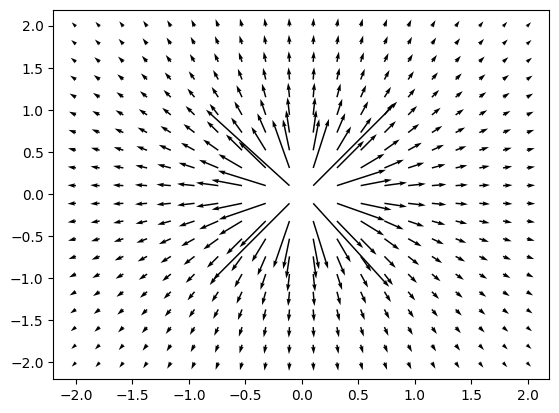

In [26]:
Efun = Einf.doit()
Efun = Efun.subs([(eps0,1e-9/(36.*np.pi)),(rL,1.e-10)]).evalf()
Ex = sp.lambdify([x,y], Efun[0])
Ey = sp.lambdify([x,y], Efun[1])
Ez = sp.lambdify([x,y], Efun[2])

#ax = plt.figure().add_subplot(projection='3d')
#ax.quiver(X,Y,Z,Ex(X,Y),Ey(X,Y),Ez(X,Y))
#plt.show()
plt.quiver(X,Y,Ex(X,Y),Ey(X,Y));

## Placa circular

Nesse problema queremos o fluxo/campo produzido por uma placa circular de determinado raio $r$, carregada com uma densidade $q_s$. O campo deve ser calculado apenas em um ponto a uma distância $h$ da placa, ao longo de uma linha perpendicular e passando pelo centro da placa. 

<center> <img src='placa-circular.svg'> </center>

In [33]:
# Vetores do problema
h = sp.symbols('h', positive=True)
qs = sp.symbols('q_s')
# Ponto acima da placa
P = sp.ImmutableDenseMatrix([0,0,h])

In [35]:
#
Q = sp.ImmutableDenseMatrix([x,y,0])

# Vetor deslocamento
R = P-Q
print('Vetor deslocamento: ')
display(Math(r'\mathbf{R} = ' + sp.latex(P) + '-' + sp.latex(Q) + '=' + sp.latex(R)))

Vetor deslocamento: 


<IPython.core.display.Math object>

Uma observação importante neste ponto. O vetor posição possui uma simetria de quadrante. Pegue dois pontos diametralmente opostos no disco, isto é, com coordenadas $x$ e $y$ de sinais opostos. 
$$ \begin{align}
\mathbf{R}_1 &= \left[-x,\, -y,\, h\right]^T\\
\mathbf{R}_2 &= \left[-(-x),\, -(-y),\, h\right]^T
\end{align}
$$

Observe que as duas primeiras componentes desses vetores são opostas, de modo que se somarmos quais dois vetores simétricos, as duas primeiras componentes sempre se anularão. Isso vale para qualquer quadrante do disco.

<center> <img src='simetria-disco.svg'> </center>

Lembre que integrar os elementos é basicamente somar todos os elementos possíveis.

As componentes do vetor de campo são a soma das componentes do vetor deslocamento. Assim, podemos concluir que o campo terá apenas a componente na direção $z$. 

In [36]:
# Transforma o vetor para componentes cilíndricas
print('Transforma o vetor para componentes cilíndricas: ')
display(Math(r'\mathbf{R} = ' + sp.latex(ret2cil) + sp.latex(R) + '=' + sp.latex(ret2cil@R)))
R = ret2cil@R

# Converte as coordenadas das componentes para sistema cilíndrico
print('Converte as coordenadas das componentes para sistema cilíndrico')
display(Math(r'\mathbf{R} = ' + sp.latex(R.subs(coord_cili))))
R = R.subs(coord_cili)

# Simplifica
print('Simplifica: ')
display(Math(r'\mathbf{R} = ' + sp.latex(R.simplify())))
R = R.simplify()

Transforma o vetor para componentes cilíndricas: 


<IPython.core.display.Math object>

Converte as coordenadas das componentes para sistema cilíndrico


<IPython.core.display.Math object>

Simplifica: 


<IPython.core.display.Math object>

O elemento de campo vai ser: 
$$d\mathbf{E} = \frac{dQ\,\mathbf{R}}{4\pi \epsilon_0|\mathbf{R}|^3}$$

In [32]:
#
display(Math(r'd\mathbf{E} = \frac{dQ\,' + 
             sp.latex(R) + r'}{4\pi \epsilon_0\,' +
             sp.latex(R.norm()**3) + '}'  ))

<IPython.core.display.Math object>

Nosso elemento de carga é cilíndrico, posicionado sobre o disco: 
$$dQ = q_s\,dS = q_s\,\rho\, d\rho\, d\phi$$

In [39]:
# Integral do campo
r = sp.symbols('r',positive=True)
E = sp.Integral(sp.Integral(qs*R*rho/(4*sp.pi*eps0*R.norm()**3)
                            ,(rho,0,r)),(phi,0,2*sp.pi))
display(Math(r'\mathbf{E} = '+ sp.latex(E)))

<IPython.core.display.Math object>

Agora... a primeira componente é realmente difícil de resolver. Você pode tentar, mas o sympy vai demorar muito tempo e não vai devolver uma resposta. Felizmente, sabemos que a primeira componente vai se anular, graças às condições de simetria do problema. Então, vamos nos preocupar apenas com a componente $z$. 

In [43]:
# Extrai apenas a componente z
Ez = sp.Integral(sp.Integral(qs*R[2]*rho/(4*sp.pi*eps0*R.norm()**3),
                             (rho,0,r)),(phi,0,2*sp.pi))
display(Math('E_z = ' + sp.latex(Ez)))

<IPython.core.display.Math object>

In [45]:
# Resolve a integral
display(Math('E_z = ' + sp.latex(Ez.doit())))
display(Math('E_z = ' + sp.latex(Ez.doit().simplify())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Suponha que $q_s = 2\epsilon_0$ e $r = 1$. Vamos plotar essa função e estudar seu comportamento. 

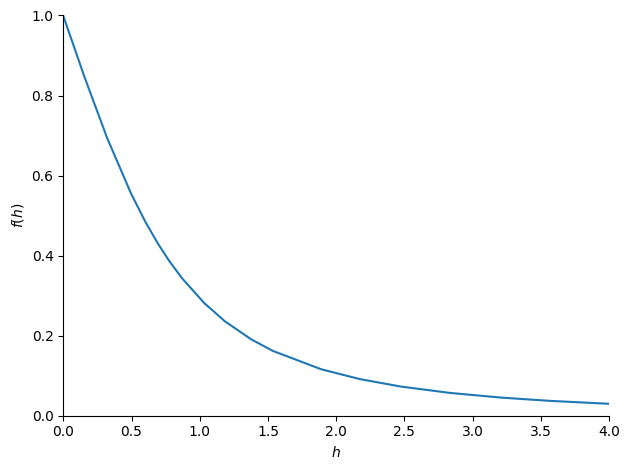

In [53]:
# Plotagem da componente z do campo
from sympy.plotting import plot
campo = Ez.doit().simplify().subs({qs: 2*eps0, r:1})
plot(campo, xlim=[0,4],ylim=[0,1]);


Outro resultado interessante é se fizermos $r\rightarrow \infty$. Isso é equivalente ao problema da placa infinita. Na prática queremos dizer que a distância $h$ é pequena em relação ao raio da placa.

In [55]:
# Campo produzido por placa infinita:
Ez_inf = sp.limit(Ez.doit().simplify(), r,sp.oo)
display(Math('E_z = ' + sp.latex(Ez_inf)))

<IPython.core.display.Math object>

Perceba que o campo é uniforme. 